In [215]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import numpy as np
import pandas as pd
import os

In [216]:
def create_df_with_bag_of_words_per_link(df):
    "takes a df with 2 columns, 'article_link' and a text column either called 'sentence' or 'keywords'"
    "and returns a df with bag of words for each link"
    text_col = df.columns.drop('article_link')[0]
    return df.groupby('article_link')[text_col].unique().str.join(' ')

In [217]:
reddit_path = r"C:\Users\Ravit\Documents\rnd\horizon_scanning_lab\articles\analyze_Articles\reddit_articles_analysis\final_results"
reddit_titles_path = os.path.join(reddit_path, "titles_textrank_final.csv")

crunch_path = r"C:\Users\Ravit\Documents\rnd\horizon_scanning_lab\articles\analyze_Articles\crunch_articles_analysis"
crunch_titles_path = os.path.join(crunch_path, "crunch_titles_textrank.csv")


1. Collect all sentences and key words from titles and texts, and agg as bag of words for each link.

In [218]:
df_red_titles = pd.read_csv(reddit_titles_path)
red_titles= df_red_titles[[ 'article_keywords', 'article_link']]

In [219]:
df_crunch_titles = pd.read_csv(crunch_titles_path)
crunch_titles= df_crunch_titles[[ 'article_keywords', 'article_link']]

In [220]:
all_titles = pd.concat([red_titles, crunch_titles], axis=0)

In [221]:
all_titles

,article_keywords,article_link
0,flying drones,https://www.globalconstructionreview.com/scien...
1,swarms,https://www.globalconstructionreview.com/scien...
2,structures,https://www.globalconstructionreview.com/scien...
3,Scientists,https://www.globalconstructionreview.com/scien...
4,Programmable Matter,https://spectrum.ieee.org/4d-printing-microscale
...,...,...
722,the speed,https://techcrunch.com/2016/08/23/logikcull-ra...
723,a thousand interns,https://techcrunch.com/2016/08/23/logikcull-ra...
724,state court records,https://techcrunch.com/2016/07/19/legalist-is-...
725,lawyers,https://techcrunch.com/2016/07/19/legalist-is-...


In [222]:
titles_bag_of_words = create_df_with_bag_of_words_per_link(all_titles).to_frame()

In [223]:
titles_bag_of_words

,article_keywords
article_link,
http://jhr.uwpress.org/content/early/2022/10/03/jhr.0222-12169R2.abstract,Cumulative Lead Exposure Reduces Academic Achi...
http://perspectivesinmedicine.cshlp.org/content/early/2022/09/12/cshperspect.a041202.abstract,Healthy Longevity International Gains
http://www.exeter.ac.uk/news/research/title_932902_en.html,better adult blue spaces Positive childhood ex...
https://9to5mac.com/2022/10/25/apple-watch-blood-oxygen-study/,Apple Watch blood oxygen sensor Apple Watch ‘m...
https://9to5mac.com/2022/10/27/apple-cant-make-enough-iphone-14-pros/,demand enough iPhone 14 Pros Apple Tim Cook iP...
...,...
https://www.zdnet.com/article/criminals-are-using-gps-jammers-to-hijack-trucks-and-down-drones/,drones trucks GPS jammers
https://www.zdnet.com/article/linus-torvalds-rust-will-go-into-linux-6-1/,Linux Linus Torvalds Rust Linus Torvalds: Linu...
https://www.zdnet.com/article/nasa-develops-a-tiny-high-powered-laser-to-find-water-on-the-moon/,"water the Moon NASA NASAs new tiny, high-power..."


In [224]:
titles_bag_of_words = titles_bag_of_words.reset_index()

In [225]:
titles_bag_of_words.columns = ['article_link', 'article_keywords']

In [226]:
titles_bag_of_words

,article_link,article_keywords
0,http://jhr.uwpress.org/content/early/2022/10/0...,Cumulative Lead Exposure Reduces Academic Achi...
1,http://perspectivesinmedicine.cshlp.org/conten...,Healthy Longevity International Gains
2,http://www.exeter.ac.uk/news/research/title_93...,better adult blue spaces Positive childhood ex...
3,https://9to5mac.com/2022/10/25/apple-watch-blo...,Apple Watch blood oxygen sensor Apple Watch ‘m...
4,https://9to5mac.com/2022/10/27/apple-cant-make...,demand enough iPhone 14 Pros Apple Tim Cook iP...
...,...,...
859,https://www.zdnet.com/article/criminals-are-us...,drones trucks GPS jammers
860,https://www.zdnet.com/article/linus-torvalds-r...,Linux Linus Torvalds Rust Linus Torvalds: Linu...
861,https://www.zdnet.com/article/nasa-develops-a-...,"water the Moon NASA NASAs new tiny, high-power..."
862,https://www.zdnet.com/article/this-nasa-space-...,EV This NASA space tech NASA


2. Vectorize bag of words

In [227]:
title_vectorizer = CountVectorizer()


In [228]:
X_titles = title_vectorizer.fit_transform(titles_bag_of_words['article_keywords'].to_list())

In [229]:
X_titles = X_titles.toarray()

3. Cluster with KMeans

In [230]:
np.random.seed(42)

In [231]:
#reduce dimensionality to 2. This will help visualize the data later. TruncatedSVD handles sparse data better than PCA

svd = TruncatedSVD(n_components=2, random_state = 0)
X = svd.fit_transform(X_titles)

In [232]:
X.shape

(864, 2)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

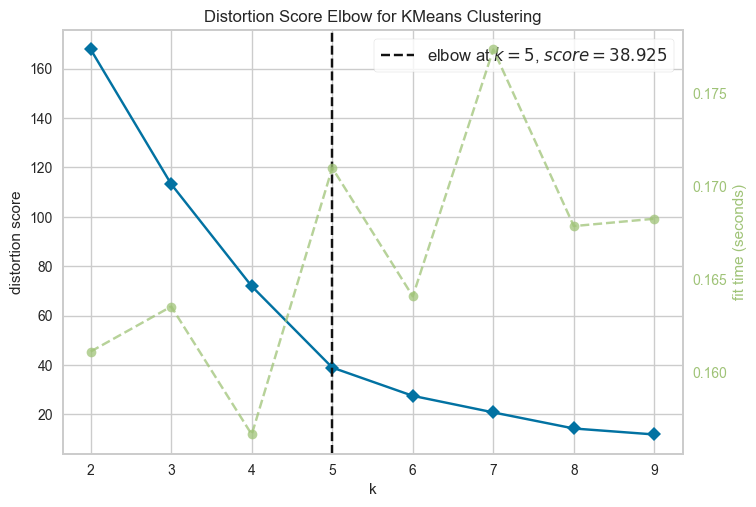

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [233]:
km = KMeans()
title_visualizer = KElbowVisualizer(km, k=(2,10), random_state=0)

title_visualizer.fit(X)
title_visualizer.show() 

In [234]:
titles_kmeans = KMeans(5, random_state=42).fit(X)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [235]:
titles_kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 2,
       0, 4, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       4, 4, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 4, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 4, 4, 4, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [236]:
titles_bag_of_words['cluster_label'] = list(titles_kmeans.labels_)

In [237]:
len(titles_bag_of_words[titles_bag_of_words['cluster_label']==0]['article_link'].unique())

638

In [238]:
X=pd.DataFrame(X, columns=['X', 'Y'])



In [239]:
X.shape

(864, 2)

In [240]:
X['cluster_label'] = titles_bag_of_words['cluster_label'].to_list()

In [241]:
X['index'] = X.index

In [242]:
X

,X,Y,cluster_label,index
0,6.021480e-04,-0.000588,0,0
1,5.780027e-03,-0.002093,0,1
2,8.249128e-04,-0.001473,0,2
3,1.083799e-01,-0.057603,0,3
4,4.006878e-02,0.032171,0,4
...,...,...,...,...
859,6.143816e-03,0.007076,0,859
860,-3.179954e-08,-0.000005,0,860
861,1.119331e+00,0.067981,2,861
862,1.326226e-01,0.142674,0,862


In [243]:
px.scatter(X, x='X', y='Y' , color='cluster_label', hover_data=['index'])

In [244]:
#purple outliers to check
#728, 132, 68, 172, 609, 70, 441, 5


In [245]:
all_titles.iloc[728]['article_link']


'https://edition.cnn.com/2022/10/29/world/emperor-penguins-threatened-species-climate-scn/index.html'

In [246]:
all_titles.iloc[132]['article_link']

'https://metro.co.uk/2022/10/13/our-patients-arent-dead-look-inside-the-us-cryogenic-freezing-lab-17556468'

In [247]:
all_titles.iloc[68]['article_link']

'https://futurism.com/scientists-discovered-secret-ingredient-life'

In [248]:
#This article my be importact for an emerging tech in cancer research
all_titles.iloc[172]['article_link']

'https://www.technologyreview.com/2022/09/12/1059266/us-trial-cancer-blood-tests-early-detection/'

In [249]:
all_titles.iloc[609]['article_link']

'https://www.cnn.com/videos/tv/2022/09/28/the-lead-senator-marco-rubio-live.cnn'

In [250]:
#HIV studies
all_titles.iloc[70]['article_link']

'https://arstechnica.com/science/2022/10/a-bold-effort-to-cure-hiv-using-crispr/'

In [251]:
#nuclear fusion
all_titles.iloc[441]['article_link']

'https://www.nationalgeographic.co.uk/science-and-technology/2022/10/many-scientists-see-fusion-as-the-future-of-energy-and-theyre-betting-big'

In [252]:
#4D printing
all_titles.iloc[5]['article_link']

'https://spectrum.ieee.org/4d-printing-microscale'

In [ ]:
#orange outliers to check 
#641, 787

In [255]:
#energy
all_titles.iloc[641]['article_link']

'https://www.euronews.com/green/2022/10/11/major-milestone-for-greek-energy-as-renewables-power-100-of-electricity-demand'

In [256]:
all_titles.iloc[787]['article_link']

'https://www.wired.com/story/drought-destroying-ancient-ruins/'

In [ ]:
#remove
idx_to_remove = [728, 132, 68, 609, 787]

In [257]:
X_copy = X.copy()

In [258]:
X_copy.drop(idx_to_remove, axis=0, inplace=True)

In [259]:
px.scatter(X_copy, x='X', y='Y' , color='cluster_label', hover_data=['index'])

In [266]:
titles_bag_of_words.iloc[X_copy[X_copy['cluster_label'] == 4]['index']]

,article_link,article_keywords,cluster_label
9,https://about.bgov.com/news/no-kill-burgers-us...,US Firms Eye Green Light Lab-Grown Meat US No-...,4
17,https://apnews.com/article/science-business-de...,renewables US GM All US facilities,4
23,https://arstechnica.com/cars/2022/09/how-elect...,US electric cars the US power,4
44,https://arstechnica.com/tech-policy/2022/11/us...,apartment price-setting software antitrust rev...,4
66,https://edition.cnn.com/2022/11/01/health/drin...,excessive drinking study US adults US 5 deaths,4
67,https://electrek.co/2022/08/26/in-a-us-first-c...,canals solar-panel canopies California US a US,4
85,https://futurism.com/the-byte/us-military-soci...,US Military Annoyed Twitter Its PSYOP Bots Fac...,4
114,https://interestingengineering.com/innovation/...,US military US own record Lockheed Martin 300-...,4
126,https://jamanetwork.com/journals/jama/article-...,Jackson Women’s Health Organization Decision O...,4
127,https://jamanetwork.com/journals/jama/fullarti...,Frontline Workers US Essential and Frontline W...,4


In [267]:
#rest of questions will be removed manually

In [270]:
titles_bag_of_words.to_csv(r"C:\Users\Ravit\Documents\rnd\horizon_scanning_lab\articles\analyze_Articles\for_cleaning_articles_reddit_and_crunch\questions_to_remove_manually.csv")